<a href="https://colab.research.google.com/github/abhishekDey11209/ML-projects/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing lib


In [81]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

importing the data

In [2]:
tf.__version__

'2.14.0'

In [3]:
df = pd.read_csv("Churn_Modelling.csv")
Columns_to_drop = ['RowNumber','CustomerId' , 'Surname'] #removing first 3 columns which we dont need
df_new = df.drop(columns=Columns_to_drop)
X = df_new.iloc[:,:-1].values
y = df_new.iloc[:,-1].values

In [4]:
print( df_new )

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0   

Basic EDA

In [5]:
df_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df_new.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Encoding Catagorical data

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer( transformers=[('encoder', OneHotEncoder(), [1])] , remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [11]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

Label encoding for Gender


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [9]:
X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

Splitting into Training set and Test set

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test,  y_train, y_test = train_test_split(X,y, test_size = 0.2,  random_state= 0)

Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [36]:
X_train

array([[-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [37]:
X_test

array([[-0.95692675,  1.62776996, -0.57427105, ...,  0.66011376,
         0.97628121,  1.62185911],
       [ 1.04501206, -0.61433742, -0.57427105, ...,  0.66011376,
        -1.02429504,  0.504204  ],
       [-0.95692675, -0.61433742,  1.74133801, ...,  0.66011376,
         0.97628121, -0.41865644],
       ...,
       [-0.95692675, -0.61433742,  1.74133801, ...,  0.66011376,
        -1.02429504,  0.72775202],
       [-0.95692675,  1.62776996, -0.57427105, ...,  0.66011376,
         0.97628121, -1.54162886],
       [-0.95692675,  1.62776996, -0.57427105, ...,  0.66011376,
        -1.02429504,  1.62356528]])

Building ANN
1. Initializing ANN
2. adding input layer and first hidden layer
3. adding 2nd hidden layer
4. adding output layer

In [38]:
ann =tf.keras.models.Sequential()

In [39]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu')) #ading first later

In [40]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu')) #2nd hidden layer

In [41]:
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))  #ading output layer  #dimention of output variable in units " we have binary output"

Training ANN


In [42]:
#compiling ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics =["accuracy"]  )  #for binary output use loss as binary_crossentropy, for other use catagorical_crossentropy

In [46]:
#training ANN on training set
train_model = ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3307 - accuracy: 0.8636
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3305 - accuracy: 0.8622
Epoch 3/100
250/250 [==============================] - 1s 6ms/step - loss: 0.3307 - accuracy: 0.8639
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3307 - accuracy: 0.8635
Epoch 5/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3309 - accuracy: 0.8631
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3306 - accuracy: 0.8626
Epoch 7/100
250/250 [==============================] - 3s 11ms/step - loss: 0.3308 - accuracy: 0.8637
Epoch 8/100
250/250 [==============================] - 2s 9ms/step - loss: 0.3308 - accuracy: 0.8640
Epoch 9/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3305 - accuracy: 0.8636
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3311 - accur

In [48]:
print(train_model.history.keys())

dict_keys(['loss', 'accuracy'])


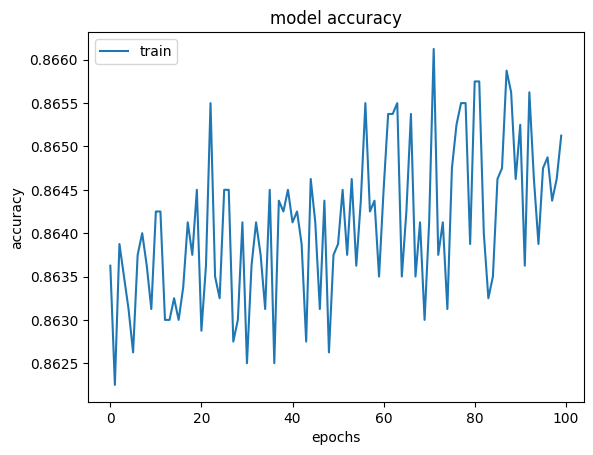

In [53]:
#model Accuracy

plt.plot(train_model.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

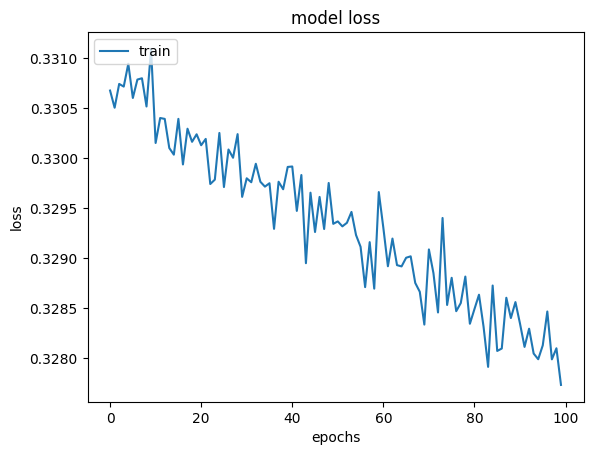

In [55]:
#Model Loss
plt.plot(train_model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [95]:
y_pred = ann.predict(X_test)
y_test_2d = y_test.reshape(-1, 1)
y_pred_binary = np.where(y_pred > 0.5, 1, 0)
print(np.concatenate((y_pred_binary, y_test_2d), axis=1))

63/63 [==============================] - 0s 3ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [96]:
#making the confusion metrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_binary)


0.8605


<Axes: >

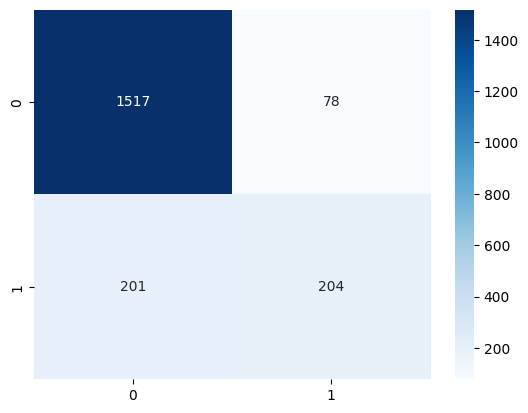

In [97]:
print(accuracy_score(y_test, y_pred_binary))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')